In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [2]:
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
X, y = datasets.make_blobs(n_samples = n_pts, random_state = 123, centers = centers, cluster_std = 0.4)

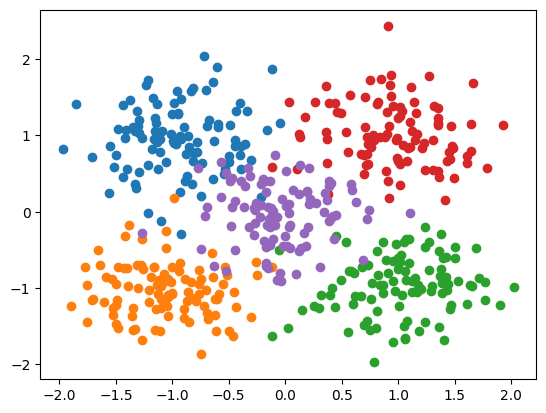

In [3]:
plt.scatter(X[y == 0, 0], X[y ==0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.scatter(X[y == 3, 0], X[y == 3, 1])
plt.scatter(X[y == 4, 0], X[y == 4, 1])

In [4]:
y_cat = to_categorical(y, 5)

In [5]:
model = Sequential()
model.add(tensorflow.keras.Input(shape= (2,)))
model.add(Dense(units = 5, activation = 'softmax'))
model.compile(Adam(0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [6]:
model.fit(x = X, y = y_cat, verbose = 1, batch_size = 50, epochs = 100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4512 - loss: 1.3641  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8121 - loss: 0.6329 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9246 - loss: 0.3925 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9351 - loss: 0.3128 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9425 - loss: 0.2780 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9289 - loss: 0.2627 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9507 - loss: 0.2372 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9494 - loss: 0.2162 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9419 - loss: 0.2204 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9466 - loss: 0.2013 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9471 - loss: 0.1983 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [7]:
def plot_decision_boundary(X, y_cat, model):
  x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 50)
  y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1, 50)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  pred_func = np.argmax(model.predict(grid), axis = 1)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


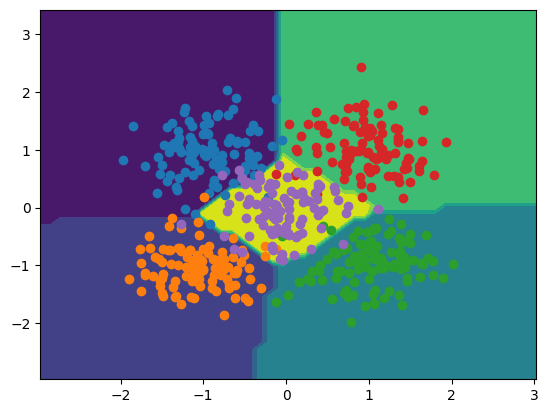

In [8]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.scatter(X[y == 3, 0], X[y == 3, 1])
plt.scatter(X[y == 4, 0], X[y == 4, 1])

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction is [2]


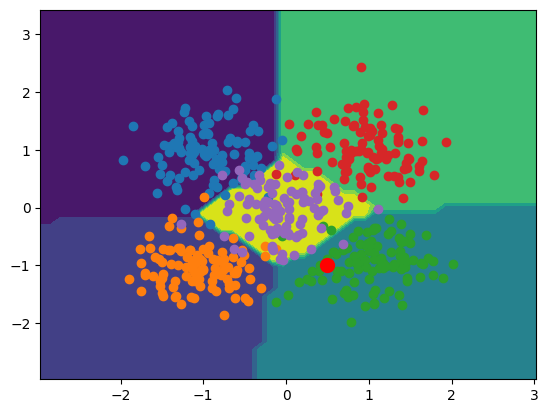

In [9]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.scatter(X[y == 3, 0], X[y == 3, 1])
plt.scatter(X[y == 4, 0], X[y == 4, 1])
x = 0.5
y = -1
point = np.array([[x, y]])
prediction = np.argmax(model.predict(point), axis = 1)
plt.plot([x], [y], marker = 'o', markersize = 10, color = 'red')
print("Prediction is", prediction)